# Fantasy Premier League Oyuncularının KMeans ile Gösterimi

Bu çalışmada, Fantasy Premier League (FPL) 2024-2025 sezonu için oyuncuları yeteneklerine göre kümeliyoruz. Bu işlem, oyuncuların benzerliklerine göre gruplandırılmasını sağlar ve böylece hangi oyuncuların birbirine benzediğini anlamamıza yardımcı olur. 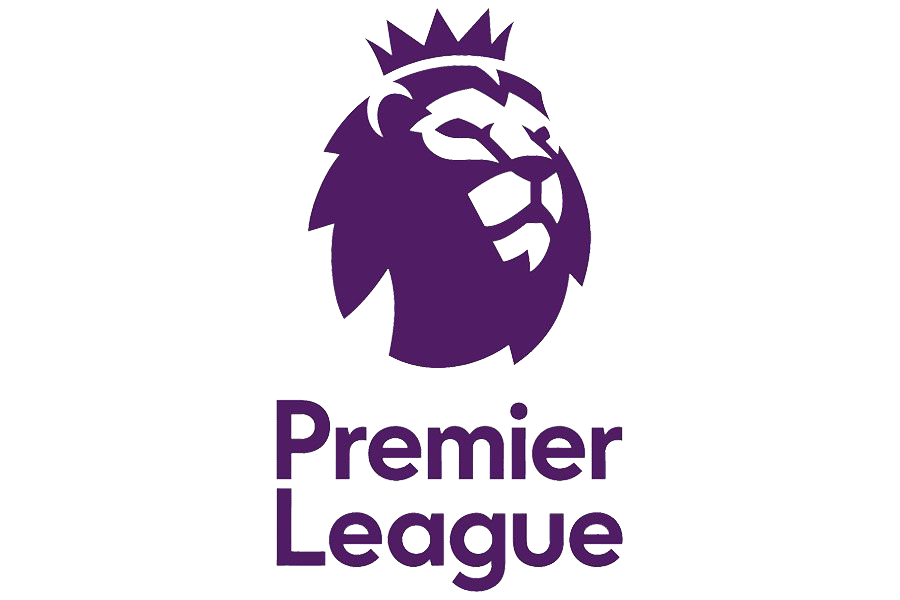

# Gerekli Kütüphanelerin İçe Aktarılması


*   Öncelikle, bu çalışmada kullanacağımız Python kütüphanelerini içe aktarıyoruz.

* pandas: Veri okuma ve işleme için kullanılır.
* scikit-learn: Veri ölçeklendirme, kümeleme ve boyut indirgeme için kullanılır.
* plotly.express: Etkileşimli grafikler oluşturmak için kullanılır.



In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px


# Veriyi Yükleme ve İnceleme
- Veriyi Google Colab üzerinde players.csv dosyasından yüklüyoruz. Veri setindeki sütunları inceleyerek hangi özelliklerin kullanılabileceğini belirliyoruz.

In [18]:
# Veriyi Yükleme
data = pd.read_csv('players.csv')

# Veri setindeki sütunları gözden geçirme
print(data.columns)

Index(['id', 'name', 'now_cost', 'position', 'team', 'ict_index_rank',
       'transfers_in', 'news_added', 'threat_rank_type',
       'cost_change_start_fall', 'red_cards', 'transfers_in_event', 'web_name',
       'expected_goal_involvements_per_90', 'form_rank', 'minutes',
       'goals_scored', 'value_season', 'chance_of_playing_next_round',
       'threat_rank', 'expected_goals_per_90', 'goals_conceded_per_90',
       'points_per_game', 'direct_freekicks_order', 'selected_rank_type',
       'expected_assists', 'form', 'selected_rank', 'influence_rank_type',
       'dreamteam_count', 'selected_by_percent', 'cost_change_start',
       'clean_sheets_per_90', 'influence_rank', 'saves', 'ict_index',
       'transfers_out', 'bps', 'expected_goals_conceded_per_90', 'ep_next',
       'news', 'assists', 'expected_goals', 'expected_goal_involvements',
       'status', 'form_rank_type', 'now_cost_rank_type', 'clean_sheets',
       'expected_goals_conceded', 'creativity', 'starts_per_90',
    

- Bu aşamada, veri setindeki tüm sütunları inceleyebilir ve kullanılacak özellikleri seçebilirsiniz.



# 3. Özellik Seçimi ve Veri Ön İşleme
- Bu adımda, oyuncuları kümelendirirken kullanacağımız feature'ları (nitelikleri) seçiyoruz. Ayrıca eksik verileri uygun şekilde dolduruyoruz ve verileri ölçeklendiriyoruz.



In [20]:
# Kullanılacak özelliklerin seçimi
features = [
    'goals_scored',
    'assists',
    'minutes',
    'clean_sheets',
    'expected_goals',
    'expected_assists',
    'influence',
    'creativity',
    'threat',
    'ict_index',
    'bonus'
]

X = data[features].copy()

# Eksik verilerin ortalama değerlerle doldurulması
X.fillna(X.mean(), inplace=True)

# Verilerin ölçeklendirilmesi (standartlaştırma)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* X: Seçtiğimiz özellikleri içeren veri kümesi.
* fillna: Eksik değerleri sütunların ortalamaları ile doldurur.
* StandardScaler: Verileri standartlaştırır (ortalama = 0, standart sapma = 1).

# Boyut İndirgeme (PCA)
- Yüksek boyutlu veriyi, daha kolay görselleştirebilmek için iki bileşene indiriyoruz.
* PCA: Veriyi iki ana bileşene indirger, bu da veri görselleştirmeyi kolaylaştırır.



In [21]:
# PCA ile boyut indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering(Kümeleme)
- K-means algoritmasını kullanarak oyuncuları 4 kümeye ayırıyoruz. K-means, veri noktalarını (oyuncuları) birbirine en yakın olacak şekilde kümelendirir.
- optimal_k: K-means algoritması için belirlenen küme sayısı (bu örnekte 4).
- kmeans.fit_predict: Veriyi K-means algoritmasıyla eğitir ve her veri noktasını bir kümeye atar.

In [23]:
# K-means kümeleme
optimal_k = 4  # Küme sayısı
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)


# Sonuçları DataFrame'e Ekleme
- Küme sonuçlarını ve PCA bileşenlerini orijinal veri setine ekliyoruz. Böylece her oyuncunun hangi kümeye ait olduğunu ve PCA bileşenlerini görebiliriz.



In [24]:
# Küme bilgilerini ve PCA bileşenlerini DataFrame'e ekleme
data['cluster'] = clusters
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]


# Görselleştirme (Scatter Plot)
- Plotly kullanarak etkileşimli bir scatter plot (dağılım grafiği) oluşturuyoruz. Bu grafikte, kümeler renklerle gösterilecek ve bir oyuncunun üzerine gelindiğinde (hover) oyuncu adı ve özellikleri gösterilecektir.
- hover_name: Fareyle bir noktanın (oyuncunun) üzerine geldiğinizde gösterilecek oyuncu adı.
- hover_data: Fareyle üzerine gelindiğinde gösterilecek ek veriler (goller, asistler, vs.).


In [25]:
# Etkileşimli Scatter Plot
fig = px.scatter(
    data,
    x='PCA1',
    y='PCA2',
    color='cluster',
    hover_name='name',
    hover_data=features,
    title=f'Player Clusters (k={optimal_k})',
    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'}
)

# Grafiği gösterme
fig.show()


In [30]:
# Stoperleri filtreleme
# Pozisyonun 'DEF' olarak geçtiğini varsayıyoruz. Eğer pozisyon farklıysa, ilgili değeri değiştirin.
stoperler = data[data['position'] == 'DEF'].copy()  # .copy() kullanarak kopya oluşturduk

# Stoperler için kullanılacak özelliklerin seçimi
features = [
    'goals_scored',
    'assists',
    'minutes',
    'clean_sheets',
    'expected_goals',
    'expected_assists',
    'influence',
    'creativity',
    'threat',
    'ict_index',
    'bonus'
]

# Stoperler için veri kümesi oluşturma
X_stoper = stoperler[features].copy()  # .copy() ile kopya oluşturuyoruz

# Eksik verilerin ortalama değerlerle doldurulması
X_stoper.fillna(X_stoper.mean(), inplace=True)

# Verilerin ölçeklendirilmesi (standartlaştırma)
X_stoper_scaled = StandardScaler().fit_transform(X_stoper)

# PCA ile boyut indirgeme
pca_stoper = PCA(n_components=2)
X_stoper_pca = pca_stoper.fit_transform(X_stoper_scaled)

# K-means kümeleme
optimal_k_stoper = 4  # Küme sayısı, dilerseniz değiştirebilirsiniz
kmeans_stoper = KMeans(n_clusters=optimal_k_stoper, n_init=10, random_state=42)
clusters_stoper = kmeans_stoper.fit_predict(X_stoper_pca)

# Küme bilgilerini ve PCA bileşenlerini stoper DataFrame'ine ekleme
stoperler.loc[:, 'cluster'] = clusters_stoper  # .loc[] ile sütunları belirterek veri ekleme
stoperler.loc[:, 'PCA1'] = X_stoper_pca[:, 0]
stoperler.loc[:, 'PCA2'] = X_stoper_pca[:, 1]

# Etkileşimli Scatter Plot sadece stoperler için
fig_stoper = px.scatter(
    stoperler,
    x='PCA1',
    y='PCA2',
    color='cluster',
    hover_name='name',
    hover_data=features,
    title=f'Stoper Clusters (k={optimal_k_stoper})',
    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'}
)

# Grafiği gösterme
fig_stoper.show()


# Modeli Kaydetme
- Son olarak, eğitilmiş K-means modelini daha sonra kullanmak üzere bir dosyaya kaydediyoruz.
- joblib.dump: Modeli 'kmeans_fpl_model.pkl' adlı bir dosyaya kaydeder. Bu model, daha sonra tekrar kullanılabilir.

In [26]:
# Modeli kaydetme
import joblib
joblib.dump(kmeans, 'kmeans_fpl_model.pkl')


['kmeans_fpl_model.pkl']

# Sonuç
- Bu adımlarla, Fantasy Premier League oyuncularını performanslarına göre gruplandırmış olduk. Etkileşimli grafik sayesinde, oyuncuları kümeler halinde görselleştirebilir, kümelerin içindeki oyuncuları inceleyebilir ve belirli oyuncu gruplarının nasıl benzer özelliklere sahip olduğunu görebiliriz. Ayrıca, bu model daha sonra kullanılmak üzere kaydedildi.

- Google Colab üzerinde bu kodları adım adım çalıştırarak oyuncuların kümelenmesini ve veri analizi sürecini daha iyi anlayabilirsiniz.